##### Taylor 5.49:
Find the Fourier coefficients $a_n$ and $b_n$ for a positive only triangle function with $f_{max} = 1$.
Make a plot comparing the function itself with the first couple of terms in the Fourier series, and another for the first six or so terms.

-----

Fourier coefficients for 1 terms:
a0 = 0.999001001001001
a1 = 0.4048797835019471, b1 = 0


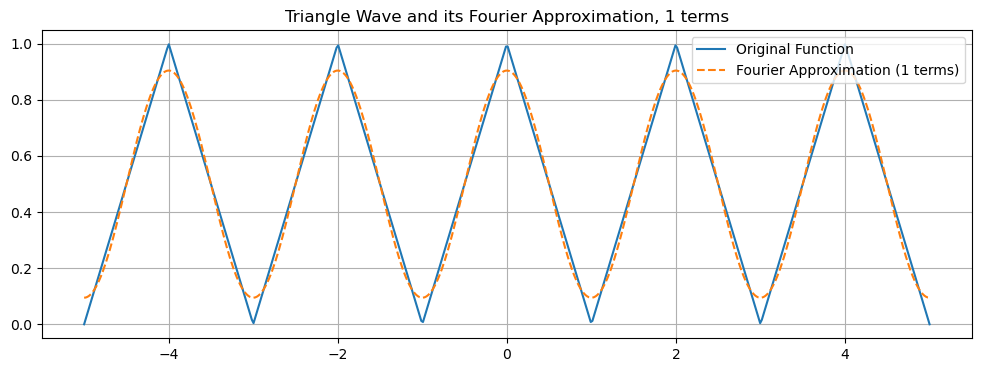

-----

Fourier coefficients for 2 terms:
a0 = 0.999001001001001
a1 = 0.4048797835019471, b1 = 0
a2 = 1.0010109002880907e-06, b2 = 0


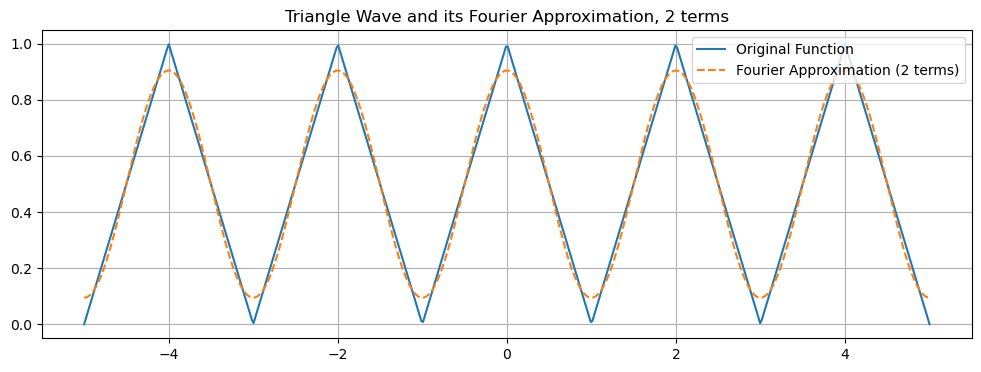

-----

Fourier coefficients for 6 terms:
a0 = 0.999001001001001
a1 = 0.4048797835019471, b1 = 0
a2 = 1.0010109002880907e-06, b2 = 0
a3 = 0.04498693920568307, b3 = 0
a4 = 1.0010405990463003e-06, b4 = 0
a5 = 0.01619551166451623, b5 = 0
a6 = 1.001090099636559e-06, b6 = 0


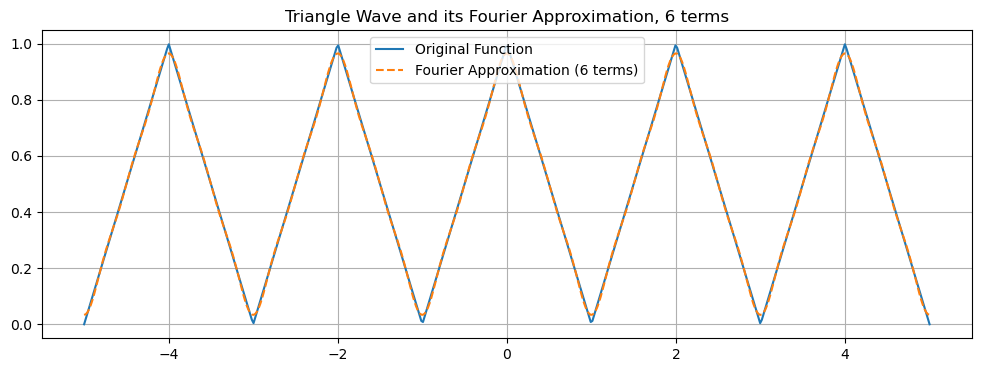

In [1]:
# Set the number of Fourier terms to examine
n_terms = [1,2,6]

# Import needed Libraries
import numpy as np
import matplotlib.pyplot as plt

# Define a function to represent the given traingular function
def triangle_wave(x):
    x = x % 2
    if 0 <= x < 1:
        return 1 - x
    else:
        return x - 1
    
# Build a Fourier series calculator
## Full disclusre, ChatGPT wrote this and I modified

def fourier_series_approximation(x, terms):
    L = 2.0
    a0 = 2 / L * np.trapz([triangle_wave(xi) for xi in np.linspace(0, L, 1000)], dx=L/1000.0)
    
    approximation = a0 / 2
    coefficients = {'a0': a0, 'an': [], 'bn': []}
    
    for n in range(1, terms + 1):
        an = 2 / L * np.trapz([triangle_wave(xi) * np.cos(2 * np.pi * n * xi / L) for xi in np.linspace(0, L, 1000)], dx=L/1000.0)
        bn = 2 / L * np.trapz([triangle_wave(xi) * np.sin(2 * np.pi * n * xi / L) for xi in np.linspace(0, L, 1000)], dx=L/1000.0)
        
        coefficients['an'].append(an)
        # To make life easier, noticed this was always zero so changed it here since random noise floats were popping up
        coefficients['bn'].append(0)
        
        approximation += an * np.cos(2 * np.pi * n * x / L) + bn * np.sin(2 * np.pi * n * x / L)
        
    return approximation, coefficients

# Create x values space
x_vals = np.linspace(-5, 5, 500)
# Calculate function given x values
y_vals_original = [triangle_wave(x) for x in x_vals]

# For each number of temrs to examine, run the functions above and build the plots
for n_term in n_terms:
    y_vals_approx, coeffs = zip(*[fourier_series_approximation(x, n_term) for x in x_vals])
    # Extract the unique a0, an, and bn values (since they will be the same for each x value)
    a0 = coeffs[0]['a0']
    an = coeffs[0]['an']
    bn = coeffs[0]['bn']
    # Display coefficients
    print('-----\n')
    print(f'Fourier coefficients for {n_term} terms:')
    print(f"a0 = {a0}")
    for n, (a, b) in enumerate(zip(an, bn)):
        print(f"a{n+1} = {a}, b{n+1} = {b}")
    plt.figure(figsize = (12,4))
    plt.plot(x_vals, y_vals_original, label="Original Function")
    plt.plot(x_vals, y_vals_approx, '--', label=f"Fourier Approximation ({n_term} terms)")
    plt.legend()
    plt.title(f"Triangle Wave and its Fourier Approximation, {n_term} terms")
    plt.grid(True)
    plt.show()

As the number of terms go up, the Fourier series better matches this triangular shaped periodic function.  Since it is essentially a cosine function, the sine terms go away ($b_n$ coefficients are all zero) and the even $a_n$ terms can also be removed as they barely effect the output.